In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [2]:
data = datasets.fetch_california_housing(as_frame=True)
df = data.frame

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']  

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
tree_regressor = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

In [6]:
y_pred_train = tree_regressor.predict(X_train)
y_pred_test = tree_regressor.predict(X_test)

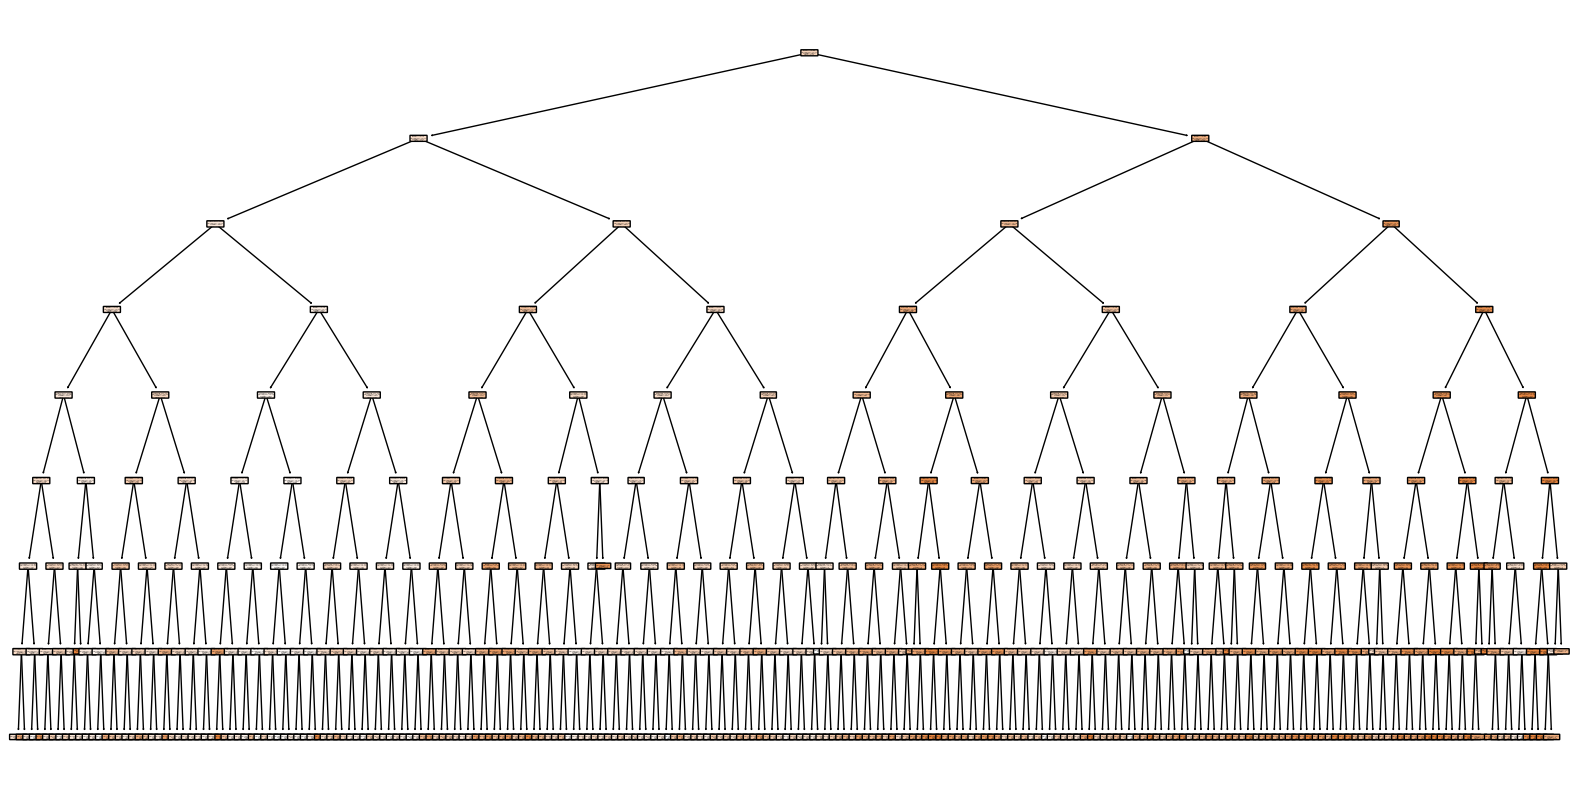

In [9]:
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_regressor, feature_names=X.columns, filled=True, rounded=True)
plt.show()

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [11]:
path = tree_regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

print("CCP Alphas:", ccp_alphas)

CCP Alphas: [0.00000000e+00 7.12177948e-17 6.13190407e-08 1.42700258e-06
 1.44986474e-06 3.02374031e-06 8.09378028e-06 9.49612403e-06
 1.00936693e-05 1.03096484e-05 1.18616279e-05 1.43898983e-05
 2.11101806e-05 2.73801781e-05 4.41404440e-05 5.48934310e-05
 5.50329558e-05 5.69825581e-05 6.13541169e-05 6.65508724e-05
 6.66417378e-05 7.09669483e-05 7.53014781e-05 7.55271349e-05
 7.63344840e-05 8.09237713e-05 8.71966286e-05 9.19746279e-05
 9.27355862e-05 9.33725775e-05 9.68139661e-05 9.72506460e-05
 1.02002561e-04 1.02420800e-04 1.09711480e-04 1.10561525e-04
 1.21242026e-04 1.29200904e-04 1.30949039e-04 1.34027335e-04
 1.36081787e-04 1.40728270e-04 1.42630214e-04 1.43002003e-04
 1.45250497e-04 1.45881448e-04 1.49450246e-04 1.52463759e-04
 1.56726986e-04 1.70261891e-04 1.71832760e-04 1.80958455e-04
 1.81332572e-04 1.82847829e-04 1.95472951e-04 1.97924287e-04
 2.03409622e-04 2.09908300e-04 2.14634597e-04 2.14663104e-04
 2.19689024e-04 2.20992467e-04 2.30180435e-04 2.30214903e-04
 2.31707557e

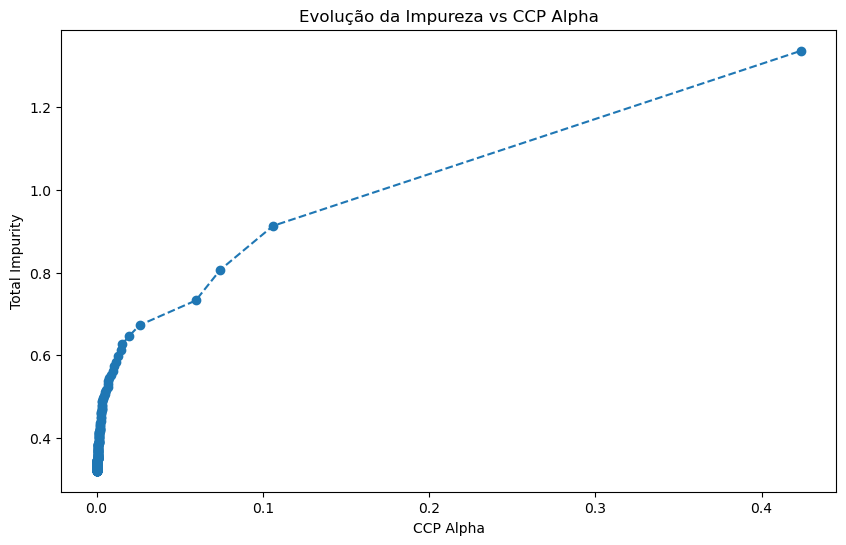

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, marker='o', linestyle='--')
plt.xlabel("CCP Alpha")
plt.ylabel("Total Impurity")
plt.title("Evolução da Impureza vs CCP Alpha")
plt.show()

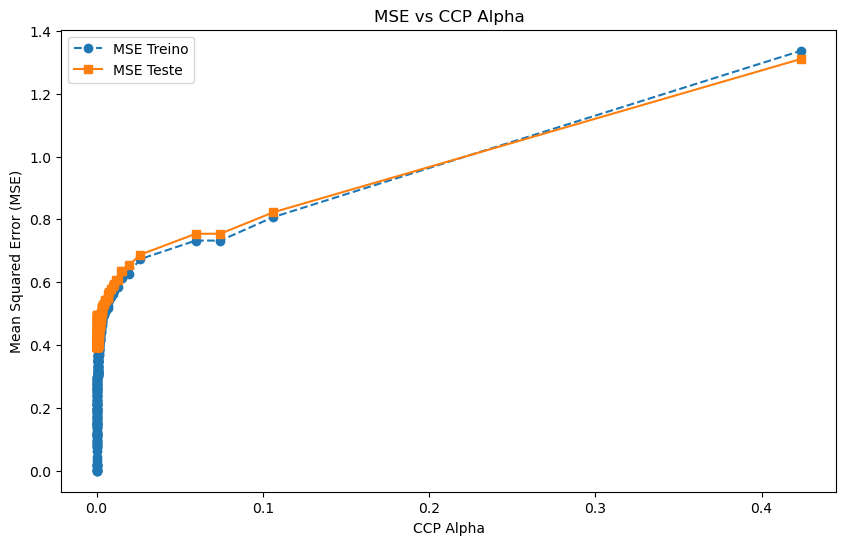

In [16]:
trees = []
mse_train = []
mse_test = []

for alpha in ccp_alphas:
    # Criar um novo modelo para cada alpha
    tree_temp = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    tree_temp.fit(X_train, y_train)

    # Fazer previsões
    y_pred_train = tree_temp.predict(X_train)
    y_pred_test = tree_temp.predict(X_test)

    # Calcular MSE
    mse_train.append(mean_squared_error(y_train, y_pred_train))
    mse_test.append(mean_squared_error(y_test, y_pred_test))

    # Salvar a árvore
    trees.append(tree_temp)

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mse_train, marker='o', linestyle='--', label="MSE Treino")
plt.plot(ccp_alphas, mse_test, marker='s', linestyle='-', label="MSE Teste")
plt.xlabel("CCP Alpha")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.title("MSE vs CCP Alpha")
plt.show()

In [15]:
best_alpha_index = mse_test.index(min(mse_test))
best_alpha = ccp_alphas[best_alpha_index]

print(f"Melhor CCP Alpha: {best_alpha}")

Melhor CCP Alpha: 0.0004828332997288574


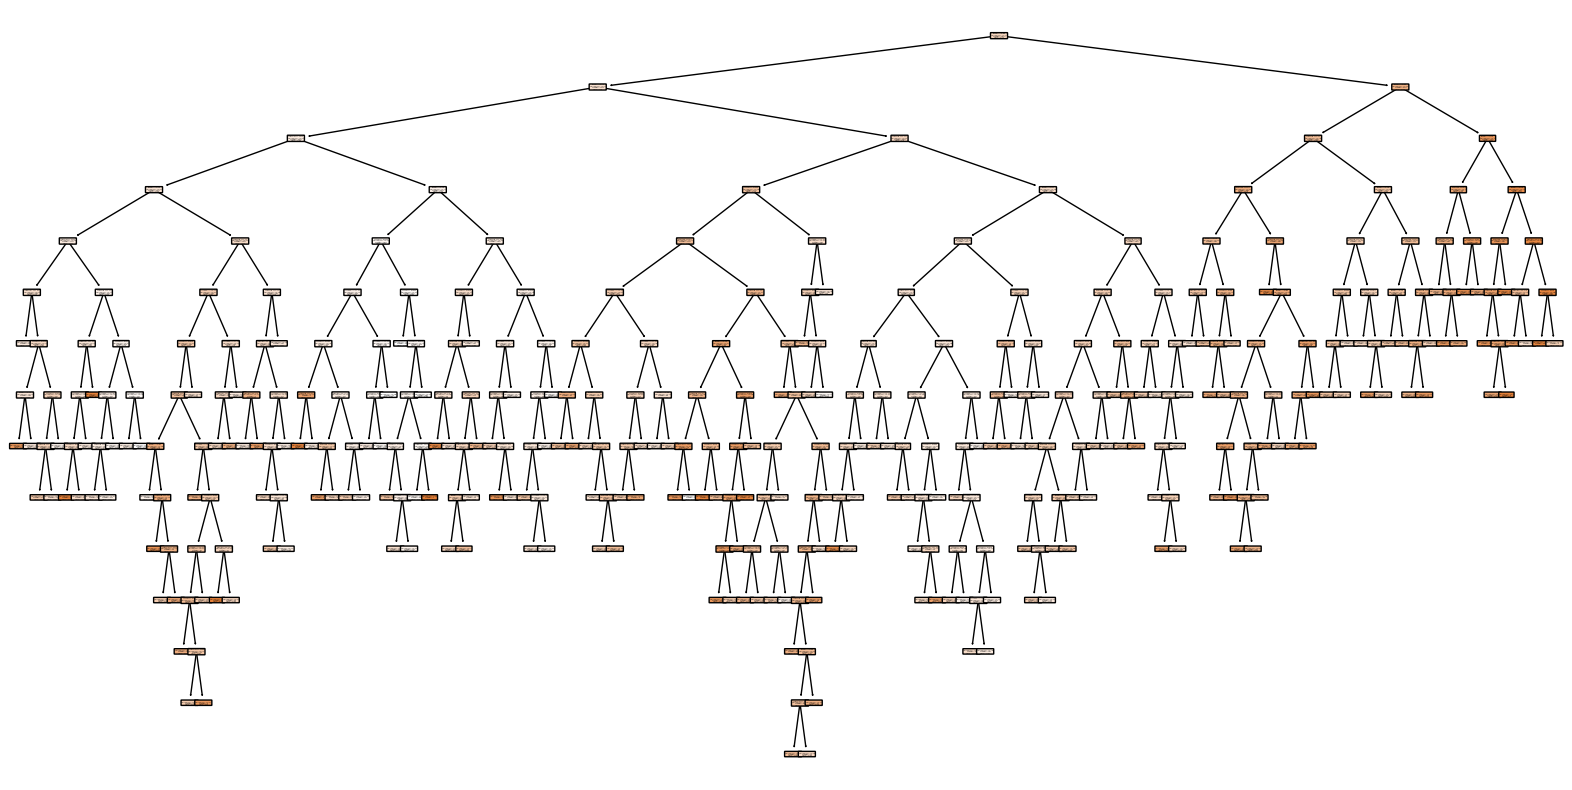

In [18]:
tree_final = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha)
tree_final.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
tree.plot_tree(tree_final, feature_names=X.columns, filled=True, rounded=True)
plt.show()

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [19]:
trees = []

# Treinar uma árvore para cada valor de ccp_alpha
for alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    tree.fit(X_train, y_train) 
    trees.append(tree)  

print(f"Total de árvores treinadas: {len(trees)}")

Total de árvores treinadas: 209


### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [28]:
# Lista para armazenar os MSEs
mse_list = []

# Calcular o MSE para cada árvore na lista
for tree in trees:
    y_pred = tree.predict(X_test)  
    mse = mean_squared_error(y_test, y_pred) 
    mse_list.append(mse)  

# Exibir os primeiros valores de MSE para verificação
for i, mse in enumerate(mse_list[:10]):
    print(f"Árvore {i+1} - MSE: {mse:.4f}")

min_mse_index = mse_list.index(min(mse_list))
print(f"\nMelhor árvore (menor MSE) é a de índice {min_mse_index} com MSE: {mse_list[min_mse_index]:.4f}")

Árvore 1 - MSE: 0.4952
Árvore 2 - MSE: 0.4952
Árvore 3 - MSE: 0.4953
Árvore 4 - MSE: 0.4937
Árvore 5 - MSE: 0.4936
Árvore 6 - MSE: 0.4915
Árvore 7 - MSE: 0.4845
Árvore 8 - MSE: 0.4848
Árvore 9 - MSE: 0.4840
Árvore 10 - MSE: 0.4843

Melhor árvore (menor MSE) é a de índice 103 com MSE: 0.3925


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

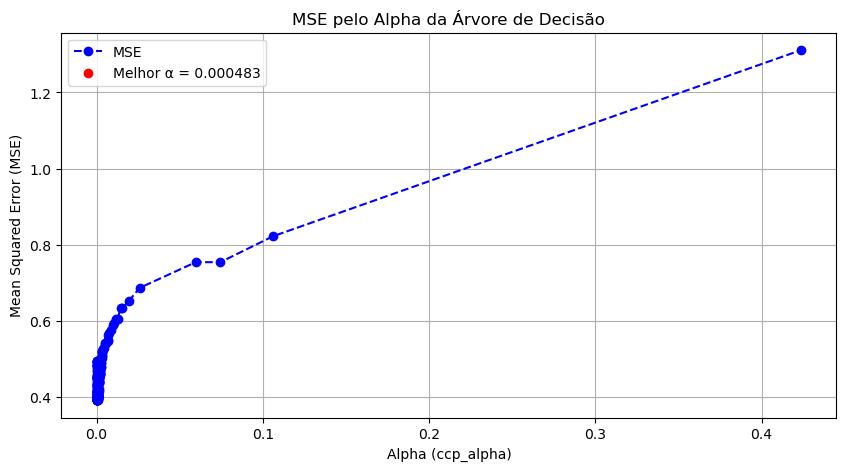

O melhor alpha encontrado é: 0.000483


In [27]:
plt.figure(figsize=(10, 5))
plt.plot(ccp_alphas, mse_list, marker="o", linestyle="--", color="b", label="MSE")

min_mse_index = mse_list.index(min(mse_list))
best_alpha = ccp_alphas[min_mse_index]

plt.scatter(best_alpha, min(mse_list), color="red", label=f"Melhor α = {best_alpha:.6f}")
plt.xlabel("Alpha (ccp_alpha)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE pelo Alpha da Árvore de Decisão")
plt.legend()
plt.grid(True)
plt.show()

print(f"O melhor alpha encontrado é: {best_alpha:.6f}")

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [25]:
best_tree = DecisionTreeRegressor(ccp_alpha=best_alpha, random_state=42)
best_tree.fit(X_train, y_train)

y_pred = best_tree.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"O R² da árvore com alpha={best_alpha:.6f} é: {r2:.4f}")

O R² da árvore com alpha=0.000483 é: 0.7005


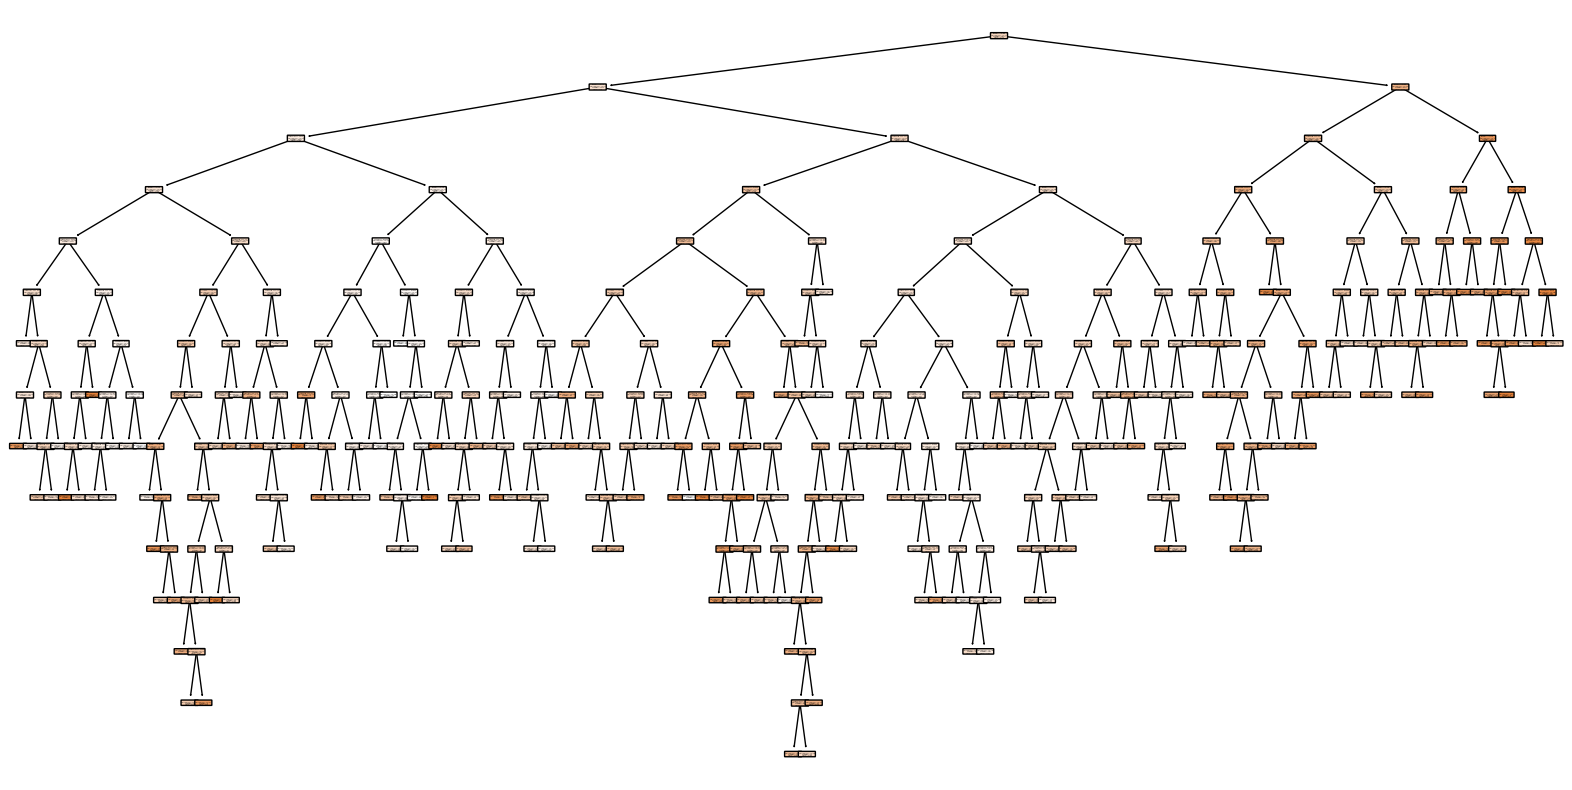

In [31]:
plt.figure(figsize=(20,10))
plot_tree(best_tree, filled=True, feature_names=X_train.columns, rounded=True)

plt.show()